# Data Prepare

In [2]:
!ls -lh 'data'

total 12K
-rw-r--r-- 1 root root 3.8K Jan  6 03:33 edges.csv
-rw-r--r-- 1 root root 1.3K Jan  6 03:33 gen_data.py
-rw-r--r-- 1 root root  461 Jan  6 03:33 nodes.csv


In [3]:
import pandas as pd

In [4]:
nodes_data = pd.read_csv('data/nodes.csv')
print(nodes_data)

    Id     Club  Age
0    0   Mr. Hi   45
1    1   Mr. Hi   33
2    2   Mr. Hi   36
3    3   Mr. Hi   31
4    4   Mr. Hi   41
5    5   Mr. Hi   42
6    6   Mr. Hi   48
7    7   Mr. Hi   41
8    8   Mr. Hi   30
9    9  Officer   35
10  10   Mr. Hi   38
11  11   Mr. Hi   44
12  12   Mr. Hi   37
13  13   Mr. Hi   39
14  14  Officer   36
15  15  Officer   38
16  16   Mr. Hi   47
17  17   Mr. Hi   45
18  18  Officer   41
19  19   Mr. Hi   31
20  20  Officer   31
21  21   Mr. Hi   44
22  22  Officer   42
23  23  Officer   32
24  24  Officer   30
25  25  Officer   50
26  26  Officer   30
27  27  Officer   43
28  28  Officer   48
29  29  Officer   40
30  30  Officer   39
31  31  Officer   45
32  32  Officer   47
33  33  Officer   33


In [8]:
print(len(nodes_data))
print(type(nodes_data))
print(nodes_data.shape)

34
<class 'pandas.core.frame.DataFrame'>
(34, 3)


In [9]:
edges_data = pd.read_csv('data/edges.csv')

     Src  Dst    Weight
0      0    1  0.318451
1      0    2  0.551215
2      0    3  0.227416
3      0    4  0.266919
4      0    5  0.475449
..   ...  ...       ...
151   33   28  0.266479
152   33   29  0.279901
153   33   30  0.652154
154   33   31  0.828536
155   33   32  0.842656

[156 rows x 3 columns]


In [10]:
print(len(edges_data))
print(type(edges_data))
print(edges_data.shape)

156
<class 'pandas.core.frame.DataFrame'>
(156, 3)


* each node means the club member

* ecah edge means the their's interactions.

In this manner, _nodes are consecutive integers starting from zero._ 

why? when preparing the data, it is imporatnt to re-label or re-shuffle the orw order so that the first row corresponding to the first nodes, so on and so forth.

In [11]:
import dgl

Using backend: pytorch


In [12]:
src = edges_data['Src'].to_numpy()
dst = edges_data['Dst'].to_numpy()

# Create a DGL graph from a pair of numpy arrays
g = dgl.graph((src, dst))

# Print a graph gives some meta information such as number of nodes and edges.
print(g)

Graph(num_nodes=34, num_edges=156,
      ndata_schemes={}
      edata_schemes={})


A DGL graph can be converted a 'networks' graph, so to utilize its rich functionalities such as visulization.

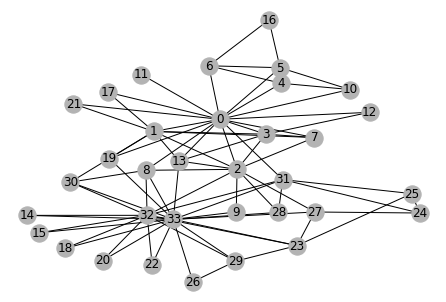

In [20]:
import networkx as nx
# Since the actual graph is undirected, we convert it for visualization
# purpos
nx_g = g.to_networkx().to_undirected()
# 'Kamada-Kawaii' layout usually looks pretty for arbitary graphs
pos = nx.kamada_kawai_layout(nx_g)
# nx.draw(nx_g, pos, with_labels=False, node_color=[[.7, .7, .7]]) if you would watch the labels on circle using True , but False
nx.draw(nx_g, pos, with_labels=True, node_color=[[.7, .7, .7]])

## Qurey graph structures

In [21]:
print('#Nodes', g.number_of_nodes())
print('#Edges', g.number_of_edges())

#Nodes 34
#Edges 156


In [22]:
g.in_degree(0)

/usr/local/lib/python3.6/dist-packages/dgl/base.py:45: DGLWarning: DGLGraph.in_degree is deprecated. Please use DGLGraph.in_degrees
  return warnings.warn(message, category=category, stacklevel=1)


16

In [25]:
g.successors(0)

tensor([ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 17, 19, 21, 31])

## Load node and edge features

_nodes and edges have attributes. Although these attributes can have arbitary types, a DGL graph only accepts attribtues stored in __tensors__(with numerical contents). The vast development of deep learning has provided us many ways to vectorize various types of attributes into numerical features. Here are some general suggestions:_


- For categorical attributes (e.g. gender, occupation), consider converting them to integers on one-hot encoding.


- For variable length string contents (e.g. news article, quote), consider applying a language model.


- For images, consider applying a vision model such as CNNs.

In [30]:
import torch 
import torch.nn.functional as F

# Prepare the age node feature
age = torch.tensor(nodes_data['Age'].to_numpy()).float() / 100
print(age)

tensor([0.4500, 0.3300, 0.3600, 0.3100, 0.4100, 0.4200, 0.4800, 0.4100, 0.3000,
        0.3500, 0.3800, 0.4400, 0.3700, 0.3900, 0.3600, 0.3800, 0.4700, 0.4500,
        0.4100, 0.3100, 0.3100, 0.4400, 0.4200, 0.3200, 0.3000, 0.5000, 0.3000,
        0.4300, 0.4800, 0.4000, 0.3900, 0.4500, 0.4700, 0.3300])


_Use __g.ndata__ to set the age features to the graph_

In [37]:
# feed the features to graph
g.ndata['age'] = age
print(g)

Graph(num_nodes=34, num_edges=156,
      ndata_schemes={'age': Scheme(shape=(), dtype=torch.float32)}
      edata_schemes={})


In [39]:
club

['Mr. Hi',
 'Mr. Hi',
 'Mr. Hi',
 'Mr. Hi',
 'Mr. Hi',
 'Mr. Hi',
 'Mr. Hi',
 'Mr. Hi',
 'Mr. Hi',
 'Officer',
 'Mr. Hi',
 'Mr. Hi',
 'Mr. Hi',
 'Mr. Hi',
 'Officer',
 'Officer',
 'Mr. Hi',
 'Mr. Hi',
 'Officer',
 'Mr. Hi',
 'Officer',
 'Mr. Hi',
 'Officer',
 'Officer',
 'Officer',
 'Officer',
 'Officer',
 'Officer',
 'Officer',
 'Officer',
 'Officer',
 'Officer',
 'Officer',
 'Officer']

In [40]:
# The 'club' column representes which community does each node belong to.
# The values are of string type, so we must convert it to either categorical
# integer values or one-hot encoding

club = nodes_data['Club'].to_list()
# Convert to categorical integer values with 0 for 'Mr. Hi', 1 for 'Officer'.
club = torch.tensor([c == 'Officer' for c in club]).long()
# We can aslo convert it to one-hot encoding.
club_onehot = F.one_hot(club) ## torch onehot 
print(club_onehot)

# Use 'g.ndata' like a normal dictionary
g.ndata.update({'club' : club, 'club_onehot' : club_onehot})
# Remove some features using del
del g.ndata['age']

print(g)

tensor([[1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [0, 1],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [0, 1],
        [0, 1],
        [1, 0],
        [1, 0],
        [0, 1],
        [1, 0],
        [0, 1],
        [1, 0],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1]])
Graph(num_nodes=34, num_edges=156,
      ndata_schemes={'club': Scheme(shape=(), dtype=torch.int64), 'club_onehot': Scheme(shape=(2,), dtype=torch.int64)}
      edata_schemes={})


Feeding edge features to a DGL graph is similar.

In [41]:
# Get edge features from the DataFrame and feed it to graph.
edge_weight = torch.tensor(edges_data['Weight'].to_numpy())
# Similary, use 'g.edata' for getting / setting edge features.
g.edata['weight'] = edge_weight

print(g)

Graph(num_nodes=34, num_edges=156,
      ndata_schemes={'club': Scheme(shape=(), dtype=torch.int64), 'club_onehot': Scheme(shape=(2,), dtype=torch.int64)}
      edata_schemes={'weight': Scheme(shape=(), dtype=torch.float64)})


# gnn

- Formulate the community detection problem as a semi-supervised node classification task.


- Build a GraphSAGE model, a popular Graph Neural Network architecture.


- Train the model and understand the result.

In [44]:
import dgl
import torch
import torch.nn as nn
import torch.nn.functional as F
import itertools

## Community detection as node classification

the model predicts the community labels only by connectivity. With the help of only a small portion of labeled nodes, a GNN can accurately predict the community labels of the others.

This tutorial will predict the community membership, w here only the labels of a few nodes are used.

_Original karate club graph , nodes are feature-less , but this tutorial builds the node of feature 'age' artifically_ For feature-less graph, a common practice is to use an embedding weight that is updated during training for every node.

We can use PyTorch's __Embedding__ module to achieve this

In [45]:
node_embed = nn.Embedding(g.number_of_nodes(), 5) # Every node has an embedding of size 5.
inputs = node_embed.weight # Use the embedding weight as the node features.
nn.init.xavier_uniform_(inputs)
print(inputs)

Parameter containing:
tensor([[-6.3195e-02,  2.3057e-01,  7.5816e-02, -1.2213e-01,  8.2240e-03],
        [-1.6485e-01,  9.3772e-02,  2.6626e-03,  2.6673e-01, -1.4367e-01],
        [-2.5983e-01,  7.4297e-02,  2.2892e-01, -9.9205e-02,  2.8094e-01],
        [-1.6389e-01, -1.8677e-01,  3.0683e-01, -3.1305e-01, -2.1447e-01],
        [-1.4793e-01, -2.1337e-01, -3.6380e-01, -2.3168e-04, -3.2403e-01],
        [-5.1414e-02,  1.6428e-02, -1.0910e-01,  2.1927e-01,  1.1852e-01],
        [ 3.4745e-01,  2.0904e-01,  2.0989e-03,  3.4167e-01, -2.3337e-01],
        [ 1.7848e-01,  1.7051e-01, -9.6417e-02, -1.5287e-01, -5.2157e-02],
        [-2.3081e-01,  5.3813e-02, -3.4786e-01,  6.6354e-02,  2.2334e-01],
        [ 2.9191e-01,  1.8725e-01, -1.1826e-01,  7.4506e-02, -1.8362e-01],
        [ 2.2958e-01, -1.3747e-01,  2.0446e-01,  1.1998e-01, -1.6191e-01],
        [-3.0302e-01, -1.8836e-01, -1.6238e-01, -7.4352e-02, -1.2068e-01],
        [ 3.3612e-01, -2.8817e-02,  3.0175e-01,  1.6528e-02, -2.3812e-01],
   

The community label is stored in the 'club' node feature ( 0 for instructor, 1 for club president). ONly nodes 0 and 33 are labeled.

In [51]:
labels = g.ndata['club']
labeled_nodes = [0, 33]
print('Labels', labels[labeled_nodes])

Labels tensor([0, 1])


## Define a GraphSAGE model

Our model consists of two layers, each computes new node representations by aggregating neighbor information.

### Creating model

In [54]:
from dgl.nn import SAGEConv

class GraphSAGE(nn.Module):
    def __init__(self, in_feats, h_feats, num_classes):
        super(GraphSAGE, self).__init__()
        self.conv1 = SAGEConv(in_feats, h_feats, 'mean')
        self.conv2 = SAGEConv(h_feats, num_classes, 'mean')
        
    def forward(self, g, in_feat):
        h = self.conv1(g, in_feat)
        h = F.relu(h)
        h = self.conv2(g, h)
        return h
# Create the model with given dimensions
# input layer dimension : 5 , node embeddings
# hidden layer dimension : 16
# output layer dimension: 2, the two classes, 0 and 1
net = GraphSAGE(5, 16, 2)

### Set up loss and optimizer

In this case, loss will in training loop

In [59]:
optimizer = torch.optim.Adam(itertools.chain(net.parameters(), node_embed.parameters()),lr=0.01)

'''
What 'itertools.chain' is the role above line ? 
->It chains (concatenates) two iterable objects. chain yields the elements of the first iterator until it gets exhausted, 
and then it yields the elements of the second one. 
In your code chain puts together the parameters of the two generators so they will be optimized simultaneously. 
'''


"\nWhat 'itertools.chain' is the role above line ? \n->It chains (concatenates) two iterable objects. chain yields the elements of the first iterator until it gets exhausted, \nand then it yields the elements of the second one. \nIn your code chain puts together the parameters of the two generators so they will be optimized simultaneously. \n"

### training

nll(negative log-likelihood)loss ; https://ratsgo.github.io/deep%20learning/2017/09/24/loss/

In [60]:
all_logits = []
for e in range(100):
    # forward
    logits = net(g, inputs)
    
    # compute loss
    logp = F.log_softmax(logits, 1)
    loss = F.nll_loss(logp[labeled_nodes], labels[labeled_nodes])
    
    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    all_logits.append(logits.detach())
    
    if e % 5 == 0 :
        print('In epoch {}, loss: {}'.format(e, loss))

In epoch 0, loss: 1.0171077251434326
In epoch 5, loss: 0.5630462765693665
In epoch 10, loss: 0.3803204894065857
In epoch 15, loss: 0.21252228319644928
In epoch 20, loss: 0.06977060437202454
In epoch 25, loss: 0.018529992550611496
In epoch 30, loss: 0.004899024963378906
In epoch 35, loss: 0.0016293886583298445
In epoch 40, loss: 0.0007126672426238656
In epoch 45, loss: 0.0003932469990104437
In epoch 50, loss: 0.0002591230149846524
In epoch 55, loss: 0.0001935740583576262
In epoch 60, loss: 0.00015781825641170144
In epoch 65, loss: 0.00013642376870848238
In epoch 70, loss: 0.00012247837730683386
In epoch 75, loss: 0.00011258537415415049
In epoch 80, loss: 0.00010507616389077157
In epoch 85, loss: 9.905684419209138e-05
In epoch 90, loss: 9.387184400111437e-05
In epoch 95, loss: 8.928281022235751e-05


### Check results

In [63]:
torch.argmax(logits, axis=1)
torch.argmax(logits, axis=0)

tensor([ 0, 33])

In [65]:
torch.argmax(logits, axis=1)

tensor([0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
        1, 1, 1, 0, 0, 1, 0, 1, 0, 1])

In [64]:
logits

tensor([[ 4.1939, -5.8486],
        [-0.0462, -1.7945],
        [-2.2182,  0.5146],
        [ 0.4431, -2.2221],
        [-1.6522, -0.7953],
        [-1.8326, -0.7878],
        [-0.5237, -1.3846],
        [-0.4123, -1.5203],
        [-3.2188,  2.4404],
        [ 2.6690, -4.2044],
        [ 0.8505, -2.4173],
        [-3.9804,  1.7234],
        [-0.7815, -1.5271],
        [-0.2244, -1.5520],
        [-2.9001,  0.8945],
        [-2.5890, -0.5585],
        [ 1.6518, -4.0839],
        [-1.1666, -1.0451],
        [-1.6886, -0.7815],
        [-0.9273, -1.4617],
        [-2.6366, -0.3427],
        [-1.0521, -1.4792],
        [-3.1293,  0.2856],
        [-3.1561, -0.1435],
        [-1.7544,  1.0733],
        [-0.7286,  0.2824],
        [-1.3989, -0.3896],
        [ 0.7027, -2.6402],
        [ 2.7532, -5.2620],
        [-2.6386,  0.0877],
        [ 0.1389, -3.3069],
        [-3.3933,  2.5863],
        [-1.1853, -1.7682],
        [-5.1282,  3.8323]], grad_fn=<AddBackward0>)

In [66]:
pred = torch.argmax(logits, axis=1)
print('Accuracy', (pred == labels).sum().item() / len(pred))

Accuracy 0.6764705882352942


_Play the module for other conv model at this docu https://docs.dgl.ai/api/python/nn.pytorch.html#module-dgl.nn.pytorch.conv_

# link_predict

- prepare training and testing sets for link prediction task.

- Build a GNN-based link prediction model.

- Train the model and verify the result.

In [67]:
import dgl
import torch
import torch.nn as nn
import torch.nn.functional as F
import itertools
import numpy as np
import scipy.sparse as sp

## Load graph and features

### node features

In [71]:
node_embed = nn.Embedding(g.number_of_nodes(), 5)
inputs = node_embed.weight
nn.init.xavier_uniform_(inputs)

Parameter containing:
tensor([[-0.2096,  0.3419,  0.3661,  0.0881,  0.0903],
        [ 0.0524,  0.1464, -0.0128,  0.0881, -0.1205],
        [-0.0902,  0.3121,  0.2884,  0.2993, -0.1092],
        [ 0.0325,  0.0249, -0.0446,  0.0988, -0.3788],
        [-0.0675, -0.0512, -0.0792, -0.0695, -0.3766],
        [-0.2666,  0.0818,  0.3848,  0.0724,  0.2271],
        [-0.0688, -0.0498, -0.3605,  0.3422,  0.2915],
        [-0.1290, -0.0620, -0.3310, -0.0345,  0.0701],
        [-0.0212,  0.2696, -0.1543, -0.1853, -0.3308],
        [-0.2986, -0.2306,  0.1448,  0.0532, -0.3373],
        [-0.2128, -0.2581,  0.2649, -0.2937,  0.3294],
        [-0.2799,  0.1773, -0.1445, -0.3904, -0.1972],
        [ 0.3467,  0.2478, -0.0240, -0.2089,  0.2034],
        [ 0.0850, -0.1033,  0.0315, -0.0248,  0.2150],
        [-0.0872, -0.0736, -0.0166, -0.2954, -0.0939],
        [-0.1006,  0.0184,  0.0207,  0.0048, -0.2985],
        [ 0.0745, -0.2782,  0.0445,  0.3394,  0.1322],
        [ 0.1120,  0.2282, -0.0723, -0.3015

## Prepare training and testing sets

In general, a link prediction data set contains two types of edges, _positive_ and _negative edges_. 

Positive edges are usually drawn from the existing edges in the graph. 

In this example, we randomly pick 50 edges for testing and leave the rest for training.


In [72]:
# Split edge set for training and testing
u, v = g.edges()
eids = np.arange(g.number_of_edges())
eids = np.random.permutation(eids)
test_pos_u, test_pos_v = u[eids[:50]], v[eids[:50]]
train_pos_u, train_pos_v = u[eids[50:]], v[eids[50:]]

Since the number of negative edges is large, sampling is usually desired. 
Since our example graph is quite small (with only 34 nodes), 
we enumerate all the missing edges are randomly pick 50 for testing and 150 for training. 

In [83]:
# Find all negative edges and split them for training and testing 
# sp.coo_matrix ; https://leebaro.tistory.com/entry/scipysparsecoomatrix <- this site is well determined
# important things for building adjancey matrix
adj = sp.coo_matrix((np.ones(len(u)), (u.numpy(), v.numpy())))
# toarray returns an ndarray; todense returns a matrix. If you want a matrix, use todense; otherwise, use toarray.
adj_neg = 1 - adj.todense() - np.eye(34) # np.eye -> own tensor
neg_u, neg_v = np.where(adj_neg != 0)
neg_eids = np.random.choice(len(neg_u), 200) # sampling
test_neg_u, test_neg_v = neg_u[neg_eids[:50]], neg_v[neg_eids[:50]] # neg_u 와 neg_eids 에서 겹치는 부분 50개 
train_neg_u, train_neg_v = neg_u[neg_eids[50:]], neg_v[neg_eids[50:]]

Put positive and negative edges together and form training and testing sets.

In [118]:
# Create training set.
train_u = torch.cat([torch.as_tensor(train_pos_u), torch.as_tensor(train_neg_u)])
train_v = torch.cat([torch.as_tensor(train_pos_v), torch.as_tensor(train_neg_v)])
train_label = torch.cat([torch.zeros(len(train_pos_u)), torch.ones(len(train_neg_u))])

# Create testing set.
test_u = torch.cat([torch.as_tensor(test_pos_u), torch.as_tensor(test_neg_u)])
test_v = torch.cat([torch.as_tensor(test_pos_v), torch.as_tensor(test_neg_v)])
test_label = torch.cat([torch.zeros(len(test_pos_u)), torch.ones(len(test_neg_u))])

## Define a GraphSAGE model

Our model consists of two layers, each computes new node representations by aggregating neighbor information. 

### Create model

In [163]:
from dgl.nn import SAGEConv # load the GraphSAGE model

class GraphSAGE(nn.Module):
    def __init__(self, in_feats, h_feats):
        super(GraphSAGE, self).__init__()
        self.conv1 = SAGEConv(in_feats, h_feats, 'mean')
        self.conv2 = SAGEConv(h_feats, h_feats, 'mean')
        
    def forward(self, g, in_feat):
        h = self.conv1(g, in_feat)
        h = F.relu(h)
        h = self.conv2(g, h)
        return h
    
# Create the model with given dimensions
# input layer ; 5
# hidden layer ; 16
net = GraphSAGE(5, 16)

loss function skipped this tutorial since can't include notation this notebook

Essentially, the model predicts a score for each edge by dot-producting the representations of its two end-points.

It then computes a binary cross entropy loss with the target y being 0 or 1 meaning whether the edge is a positive one or not.

### loss and optimizer

In [164]:
optimizer = torch.optim.Adam(itertools.chain(net.parameters(), node_embed.parameters()),lr=0.01)

### training

In [166]:
all_logits = []
for e in range(100):
    # forward
    logits = net(g, inputs)
    pred = torch.sigmoid((logits[train_u] * logits[train_v]).sum(dim=1))
    
    # compute loss
    loss = F.binary_cross_entropy(pred, train_label)
    
    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    all_logits.append(logits.detach()) # detach means the removing the learned weights
    
    if e % 5 == 0:
        print(f'In epoch {e}, loss: {loss}')

In epoch 0, loss: 2.610297441482544
In epoch 5, loss: 0.7246600389480591
In epoch 10, loss: 0.7042901515960693
In epoch 15, loss: 0.6484047174453735
In epoch 20, loss: 0.5903229713439941
In epoch 25, loss: 0.5288605690002441
In epoch 30, loss: 0.47247737646102905
In epoch 35, loss: 0.43202507495880127
In epoch 40, loss: 0.39784297347068787
In epoch 45, loss: 0.37148699164390564
In epoch 50, loss: 0.35092073678970337
In epoch 55, loss: 0.33550670742988586
In epoch 60, loss: 0.3204990327358246
In epoch 65, loss: 0.30422699451446533
In epoch 70, loss: 0.28606143593788147
In epoch 75, loss: 0.2646508812904358
In epoch 80, loss: 0.23901839554309845
In epoch 85, loss: 0.213231161236763
In epoch 90, loss: 0.18495729565620422
In epoch 95, loss: 0.15635673701763153


### result

In [167]:
pred = torch.sigmoid((logits[test_u] * logits[test_v]).sum(dim=1))
print('Accuracy', ((pred >= 0.5) == test_label).sum().item() / len(pred))

Accuracy 0.8


# message_passing

## Customize Graph Convolution using Message Passing APIs

In previous session, we have learned using the built-in 'graph convolution modules' to build a multi-layer graph neural network.

__However, sometimes one desires to invent a new way of aggregating neighbor information__.

__DGL's message passing APIs are designed for this scenario.__

- What is under the hood of the 'nn.SAGEConv' module in DGL?

- DGL's message passing APIs.

- Design a new graph convolution module.

In [172]:
import dgl.function as fn

class SAGEConv(nn.Module):
    def __init__(self, in_feat, out_feat):
        super(SAGEConv, self).__init__()
        # A linear submodule for projecting the input and neighbor feature to the output.
        self.linear = nn.Linear(in_feat * 2, out_feat)
        
    def forward(self, g , h):
        # g ; input graph
        # h ; input node feature
        
        # All the 'ndata' set within a local scope will be automatically popped out.
        with g.local_scope():
            g.ndata['h'] = h
            # update_all is a message passing API.
            g.update_all(fn.copy_u('h', 'm'), fn.mean('m', 'h_neigh'))
            h_neigh = g.ndata['h_neigh']
            h_total = torch.cat([h, h_neigh], dim=1)
            return F.relu(self.linear(h_total))    

## Even more customization by user-defined function

DGL allows user-defined message and reduce function for the maximal expressiveness. 

Here is a user-defined message function that is equivalent to 'fn.u_mul_e('h', 'w', 'm').

In [173]:
def u_mul_e_udf(edges):
    return {'m' : edges.src['h'] * edges.data['w']}

## Recap

- __dgl.nn__ provides many popular modules for quick bootstrap.


- using the built-in message and reduce function in __dgl.function__ to customize a new NN module.


- User-defined function provides even more flexibility.